## Geneformer Fine-Tuning for Classification of Dosage-Sensitive vs. -Insensitive Transcription Factors (TFs)

### Train gene classifier with 5-fold cross-validation:

### Setting system paths

In [1]:
import sys
if '/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer' not in sys.path:
    sys.path.append('/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer')

In [2]:
import sys
if '/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer' not in sys.path:
    sys.path.append('/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer')

### Import Necessary Libraries

In [ ]:
import datetime
import pickle
from geneformer import Classifier

In [3]:
# Generate timestamps for output directory
current_date_accurate = datetime.datetime.now()
datestamp = f"{str(current_date_accurate.year)[-2:]}{current_date_accurate.month:02d}{current_date_accurate.day:02d}{current_date_accurate.hour:02d}{current_date_accurate.minute:02d}{current_date_accurate.second:02d}"
datestamp_min = f"{str(current_date_accurate.year)[-2:]}{current_date_accurate.month:02d}{current_date_accurate.day:02d}"
# Create output directory
output_prefix = "tf_dosage_sens_test"
output_dir = f"/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/output_directory_gene_class_pancreas/{datestamp}"
!mkdir $output_dir

/part-vol-2/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
with open("/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Data/Genecorpus-30M/example_input_files/gene_classification/dosage_sensitive_tfs/dosage_sensitivity_TFs.pickle", "rb") as fp:
    gene_class_dictionary= pickle.load(fp)

In [ ]:
# Initialize classifier instance
cc = Classifier(classifier="gene",
                gene_class_dict= gene_class_dictionary,
                freeze_layers = 4,  
                num_crossval_splits = 5, 
                forward_batch_size=64, 
                nproc=8) 

### Preparing data

In [6]:
# Prepare data for training
cc.prepare_data(input_data_file="/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Data/Genecorpus-30M/Pancreas/data/datasets/geneformer/pancreas_scib/pancreas_scib.dataset",
                output_directory=output_dir,
                output_prefix=output_prefix)

Saving the dataset (0/1 shards):   0%|          | 0/16381 [00:00<?, ? examples/s]

Saving the dataset (1/1 shards): 100%|██████████| 16381/16381 [00:00<00:00, 36206.92 examples/s]


### Training the model

In [7]:
# Train and validate the model
all_metrics = cc.validate(model_directory="/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer",
                          prepared_input_data_file=f"{output_dir}/{output_prefix}_labeled.dataset",
                          id_class_dict_file=f"{output_dir}/{output_prefix}_id_class_dict.pkl",
                          output_directory=output_dir,
                          output_prefix=output_prefix)

0it [00:00, ?it/s]

****** Validation split: 1/5 ******



Map (num_proc=8): 100%|██████████| 15069/15069 [00:02<00:00, 5119.98 examples/s]
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To 

Step,Training Loss
136,0.001400
272,0.000900
408,0.000400
544,0.000100
680,0.000000


100%|██████████| 213/213 [04:53<00:00,  1.38s/it]
1it [11:05, 665.62s/it]

****** Validation split: 2/5 ******



Map (num_proc=8): 100%|██████████| 14118/14118 [00:02<00:00, 4994.56 examples/s]
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To 

Step,Training Loss
136,0.001500
272,0.001000
408,0.000500
544,0.000100
680,0.000000


100%|██████████| 230/230 [05:15<00:00,  1.37s/it]
2it [22:21, 671.38s/it]

****** Validation split: 3/5 ******



Map (num_proc=8): 100%|██████████| 13300/13300 [00:02<00:00, 4948.88 examples/s]
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To 

Step,Training Loss
136,0.001600
272,0.001100
408,0.000500
544,0.000100
680,0.000000


100%|██████████| 219/219 [05:04<00:00,  1.39s/it]
3it [33:37, 673.86s/it]

****** Validation split: 4/5 ******



Map (num_proc=8): 100%|██████████| 13137/13137 [00:02<00:00, 4907.72 examples/s]
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To 

Step,Training Loss
136,0.001500
272,0.001000
408,0.000500
544,0.000100
680,0.000000


100%|██████████| 205/205 [04:43<00:00,  1.38s/it]
4it [44:30, 665.43s/it]

****** Validation split: 5/5 ******



Map (num_proc=8): 100%|██████████| 15057/15057 [00:03<00:00, 4689.30 examples/s]
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To 

Step,Training Loss
136,0.001400
272,0.000900
408,0.000500
544,0.000100
680,0.000000


100%|██████████| 230/230 [05:18<00:00,  1.38s/it]
4it [56:05, 841.44s/it]


### Plotting the metrics

<Figure size 1000x1000 with 0 Axes>

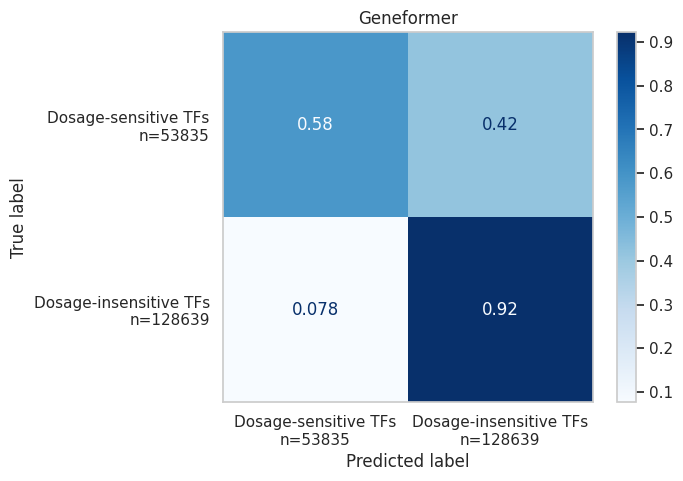

In [8]:
#Plot confusion matrix
cc.plot_conf_mat(
    conf_mat_dict={"Geneformer": all_metrics["conf_matrix"]},
    output_directory=output_dir,
    output_prefix=output_prefix,
)

### ROC Curve (Receiver operating characteristic curve)

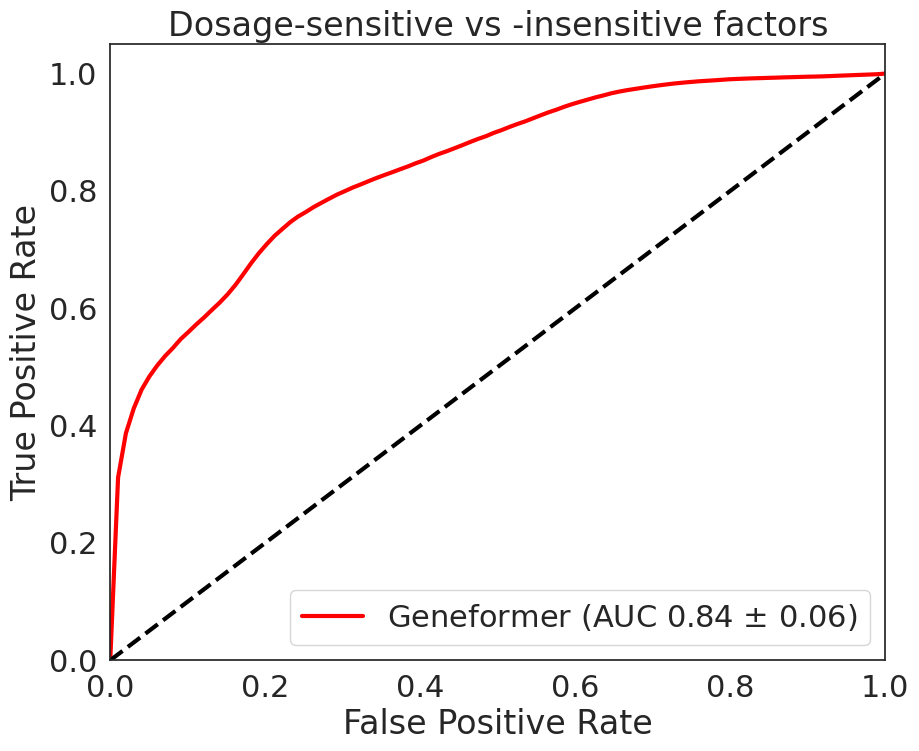

In [9]:
#roc curve
cc.plot_roc(
    roc_metric_dict={"Geneformer": all_metrics["all_roc_metrics"]},
    model_style_dict={"Geneformer": {"color": "red", "linestyle": "-"}},
    title="Dosage-sensitive vs -insensitive factors",
    output_directory=output_dir,
    output_prefix=output_prefix,
)

In [10]:
all_metrics

{'conf_matrix':                         Dosage-sensitive TFs  Dosage-insensitive TFs
 Dosage-sensitive TFs                 31431.0                 22404.0
 Dosage-insensitive TFs               10016.0                118623.0,
 'macro_f1': [0.711607749679822,
  0.7888052935471481,
  0.9104699838486644,
  0.6423197946980793,
  0.7556275169572628],
 'acc': [0.8074685428223515,
  0.8024034773715162,
  0.9370018437101121,
  0.7320303876371664,
  0.8239988104678826],
 'all_roc_metrics': {'mean_tpr': array([0.        , 0.31145256, 0.38691653, 0.42915044, 0.46110923,
         0.48380925, 0.5023983 , 0.51842969, 0.53219423, 0.54744327,
         0.55970851, 0.57254889, 0.58445999, 0.59733822, 0.60987489,
         0.62386133, 0.63984292, 0.65811083, 0.67684394, 0.69412068,
         0.70942662, 0.72356931, 0.73527757, 0.74680056, 0.75641865,
         0.76417532, 0.772593  , 0.77986419, 0.78697929, 0.79393869,
         0.7998258 , 0.80586916, 0.81108532, 0.81664112, 0.82195453,
         0.82695679,

In [11]:
import datetime
import pickle
from geneformer import Classifier

current_date = datetime.datetime.now()
datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"
datestamp_min = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}"


output_prefix = "tf_dosage_sens_alldata"
output_dir = f"/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/output_directory_gene_class_pancreas/training_files/{datestamp}"
!mkdir $output_dir

In [12]:
with open("/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Data/Genecorpus-30M/example_input_files/gene_classification/dosage_sensitive_tfs/dosage_sensitivity_TFs.pickle", "rb") as fp:
    gene_class_dictionary= pickle.load(fp)

In [13]:
!nvidia-smi

Mon Jun 10 20:18:24 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.76                 Driver Version: 550.76         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     On  |   00000000:3E:00.0 Off |                  N/A |
|  0%   32C    P8              1W /  180W |    5473MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [14]:
cc = Classifier(classifier="gene",
                gene_class_dict= gene_class_dictionary,
                max_ncells = 10_000,
                freeze_layers = 4,
                num_crossval_splits = 5,
                forward_batch_size=32,
                nproc=8)

Hyperparameter tuning is highly recommended for optimal results. No training_args provided; using default hyperparameters.


In [15]:
cc.prepare_data(input_data_file="/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Data/Genecorpus-30M/Pancreas/data/datasets/geneformer/pancreas_scib/pancreas_scib.dataset",
                output_directory=output_dir,
                output_prefix=output_prefix)

Saving the dataset (1/1 shards): 100%|██████████| 16381/16381 [00:00<00:00, 35581.27 examples/s]


In [16]:
trainer_test = cc.train_all_data(model_directory="/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer",
                                 prepared_input_data_file=f"{output_dir}/{output_prefix}_labeled.dataset",
                                 id_class_dict_file=f"{output_dir}/{output_prefix}_id_class_dict.pkl",
                                 output_directory=output_dir,
                                 output_prefix=output_prefix)

Map (num_proc=8): 100%|██████████| 10000/10000 [00:02<00:00, 4401.24 examples/s]
mkdir: cannot create directory ‘/part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/output_directory_gene_class_pancreas/training_files/240610201824/240610_geneformer_geneClassifier_tf_dosage_sens_alldata/’: File exists
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /part-vol-2/weaver-core/particle_transformer_quant/notebooks/Fun_Gen/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/part-vol-2/.venv/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause t

Step,Training Loss
83,0.002100
166,0.001700
249,0.001500
332,0.001200
415,0.001000


# The results shown above are for one instance of code and not the best results achieved so far.

In [17]:
!nvidia-smi

Mon Jun 10 20:21:40 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.76                 Driver Version: 550.76         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     On  |   00000000:3E:00.0 Off |                  N/A |
|  0%   58C    P2             45W /  180W |    1981MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----